In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Ejercicio: La temperatura promedio de una máquina es de 37°C, con una desviación estándar medida de 1.5 ºC. Suponiendo que la distribución de la temperatura puede ser _aproximada_ por una normal, ¿qué tan probable es encontrar una temperatura de 35 o menos?

$$
p(x \leq 35)
$$

In [4]:
mean = 37
std = 1.5
# x = np.linspace(-273, 37, 1000)
x = 35
norm.cdf(x,mean,std)

0.09121121972586788

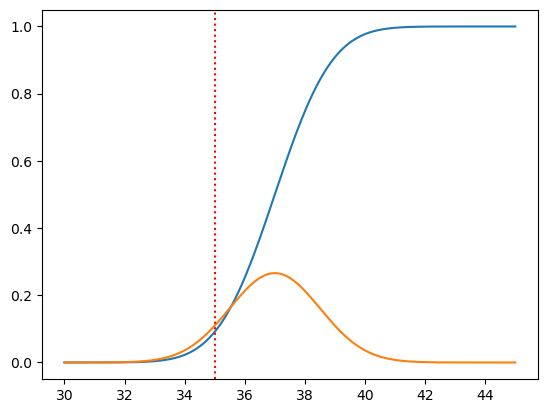

In [16]:
rx = np.linspace(30, 45, 1000)
cum_fun = norm.cdf(rx,mean,std)
plt.plot(rx, cum_fun);
den_fun = norm.pdf(rx,mean,std);
plt.plot(rx, den_fun)
plt.axvline(35, ls=':',c='r') #linestyle, color

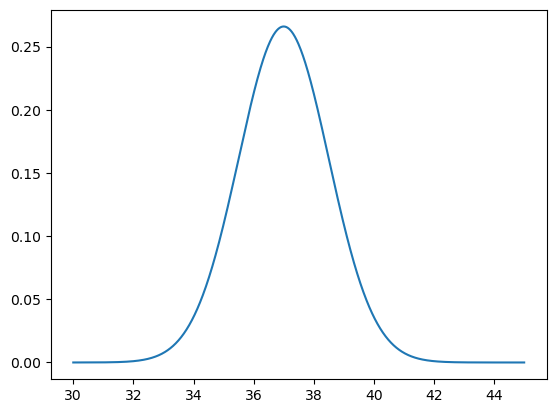

In [10]:
rx = np.linspace(30, 45, 1000)
den_fun = norm.pdf(rx,mean,std);
plt.plot(rx, den_fun)

$$
f(x) = x^2
$$

obtener

$$
F(x) = \int_0^2 f(x)dx
$$

In [23]:
# integracion numerica
from scipy.integrate import quad

# definir f(x)

def f(x):
    return x**2

quad(f,a=0, b=2)


(2.666666666666667, 2.960594732333751e-14)

In [31]:
mean = 37
std = 1.5
# x = np.linspace(-273, 37, 1000)
x = 35
norm.cdf(x,mean,std)

0.09121121972586788

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

In [30]:
# definamos nuestra propia funcion normal

def normal(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))
# 
quad(normal, -np.inf, 35, args=(37, 1.5)) # same as norm.cdf(35, 37, 1.5)

(0.0912112197258679, 1.428527094724896e-11)

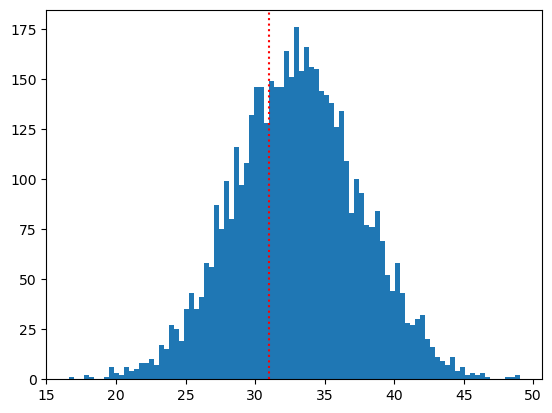

In [39]:
# ejemplo, azucar de agave, media=33, sd=4.5 parametros poblacionales
random_normal_var = norm.rvs(33, 4.5, 5000)
plt.hist(random_normal_var, bins=90);
plt.axvline(31, c='red', ls=':')

In [44]:
media = 22
# que tan probable es obtener una media de 31 si proviene de una poblacion con media=33 y sd=4.5?
quad(normal, -np.inf, media, args=(33, 4.5))

(0.007253771124867805, 2.0168614789731595e-11)

In [45]:
norm.cdf(22,33,4.5)

0.007253771124867817

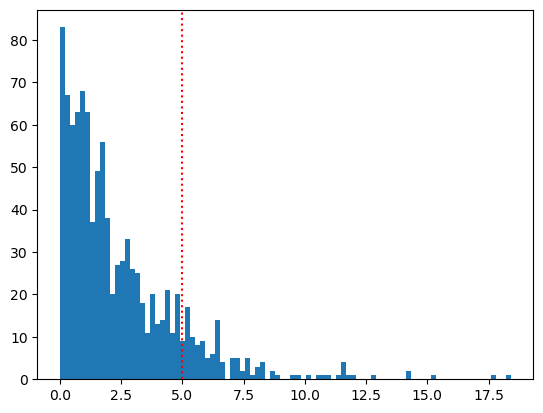

In [49]:
from scipy.stats import expon
rvs_expon = expon.rvs(scale=2.5, size=1000)
plt.hist(rvs_expon,bins=90);
plt.axvline(5,ls=':', c='r')

In [48]:
x=5
expon.cdf(5, 2.5)

0.9179150013761012

In [50]:
# cual es la probabilidad de x despues de 5 horas
1-expon.cdf(5, 2.5)

0.08208499862389884

In [52]:
# cual es la probabilidad de x entre 3 y 7 horas?
expon.cdf(7, 2.5) - expon.cdf(3, 2.5)

0.5954216631743912

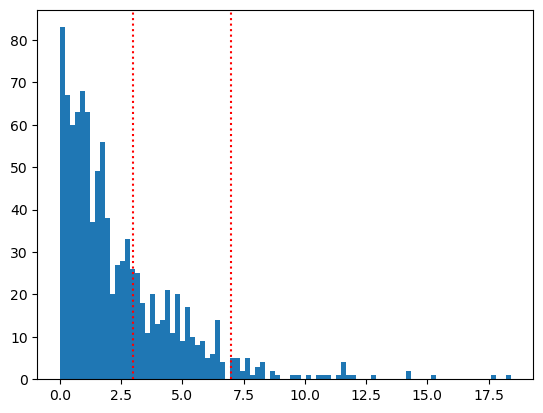

In [53]:
plt.hist(rvs_expon,bins=90);
plt.axvline(3,ls=':', c='r')
plt.axvline(7,ls=':', c='r')

In [56]:
1-expon.cdf(7, 2.5)

0.011108996538242266

scale: tamaño del intervalo (rango), limite superior - limite inferior

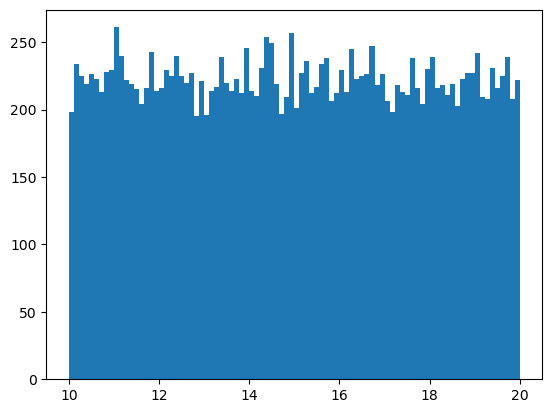

In [60]:
from scipy.stats import uniform
rvs_unif = uniform.rvs(10, 10, 20000)
plt.hist(rvs_unif, bins=90);

In [71]:
# cual seria la probabilida de x <= 14?
uniform.cdf(11.1, 10, 10)

0.10999999999999996

In [67]:
1/10

0.1